# How to extract a table from a website with pandas

In [1]:
# Import Libraries

In [2]:
import pandas as pd 
import numpy as np

In [3]:
# We load in a dataframe the information of our URL

In [4]:
df=pd.read_html('https://www.parliament.uk/mps-lords-and-offices/mps/') 

In [5]:
# We save the complete table in a DataFrame 

In [6]:
df=pd.DataFrame(df[0]) # To extract tables from a web page  df[0]

In [7]:
# Print DataFrame 

In [8]:
df.head()

,"Surname, First name",Constituency
0,A,back to top
1,"Abbott, Ms Diane (Labour)",Hackney North and Stoke Newington
2,"Abrahams, Debbie (Labour)",Oldham East and Saddleworth
3,"Adams, Nigel (Conservative)",Selby and Ainsty
4,"Afolami, Bim (Conservative)",Hitchin and Harpenden


In [9]:
df.info() # Information of our original table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 2 columns):
Surname, First name    674 non-null object
Constituency           674 non-null object
dtypes: object(2)
memory usage: 10.6+ KB


In [10]:
# We eliminate all the elements that contain the chain 'back to top'

In [11]:
df = df.drop(df[df['Constituency']=='back to top'].index)

In [12]:
# We confirm if the rows we wanted were eliminated

In [13]:
df.head()

,"Surname, First name",Constituency
1,"Abbott, Ms Diane (Labour)",Hackney North and Stoke Newington
2,"Abrahams, Debbie (Labour)",Oldham East and Saddleworth
3,"Adams, Nigel (Conservative)",Selby and Ainsty
4,"Afolami, Bim (Conservative)",Hitchin and Harpenden
5,"Afriyie, Adam (Conservative)",Windsor


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 1 to 673
Data columns (total 2 columns):
Surname, First name    650 non-null object
Constituency           650 non-null object
dtypes: object(2)
memory usage: 15.2+ KB


# We are ready to work with this DataFrame

As we can see we have the names and surnames in a single column, what we are going to do at this moment is to separate them and include them in our dataframes in separate columns.

In [15]:
df['Surname, First name'].iloc[0].split(',')[0] # we Split Surname

'Abbott'

In [16]:
df['Surname, First name'].iloc[0].split(',')[1].split('(')[0] # We Split Firstname

' Ms Diane  '

In [17]:
df['Surname, First name'].iloc[0].split(',')[1].split('(')[1][:-1] # We Split Party

'Labour'

# Cycle to modify our DataFrame

1. We load individual vectors for each category
2. We create a new DataFrame and we use a dictionary to fill it correctly

In [18]:
New_Sn=[] # Array Surname
New_Fn=[] # Array Firstname
New_Pp=[] # Array Party 
for i in range(650):
    New_Sn.append(df['Surname, First name'].iloc[i].split(',')[0])
    New_Fn.append(df['Surname, First name'].iloc[i].split(',')[1].split('(')[0])
    New_Pp.append(df['Surname, First name'].iloc[i].split(',')[1].split('(')[1][:-1])   

In [19]:
New_df = pd.DataFrame({"Surname": New_Sn, "Firstname": New_Fn,
                       "Political Party":New_Pp , "Constituency":df['Constituency']})

In [20]:
New_df.head()

,Surname,Firstname,Political Party,Constituency
1,Abbott,Ms Diane,Labour,Hackney North and Stoke Newington
2,Abrahams,Debbie,Labour,Oldham East and Saddleworth
3,Adams,Nigel,Conservative,Selby and Ainsty
4,Afolami,Bim,Conservative,Hitchin and Harpenden
5,Afriyie,Adam,Conservative,Windsor


In [21]:
New_df['Political Party'].value_counts()

Conservative                 317
Labour                       256
Scottish National Party       35
Liberal Democrat              11
Democratic Unionist Party     10
Independent                    8
Sinn Féin                      7
Plaid Cymru                    4
Green Party                    1
Speaker                        1
Name: Political Party, dtype: int64

# Data Visualization

We create a new DataFrame to facilitate the manipulation of data and then import display libraries  

In [22]:
df_vis=pd.DataFrame(New_df['Political Party'].value_counts())

In [23]:
df_vis

,Political Party
Conservative,317
Labour,256
Scottish National Party,35
Liberal Democrat,11
Democratic Unionist Party,10
Independent,8
Sinn Féin,7
Plaid Cymru,4
Green Party,1
Speaker,1


In [24]:
# Visualization Libraries

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

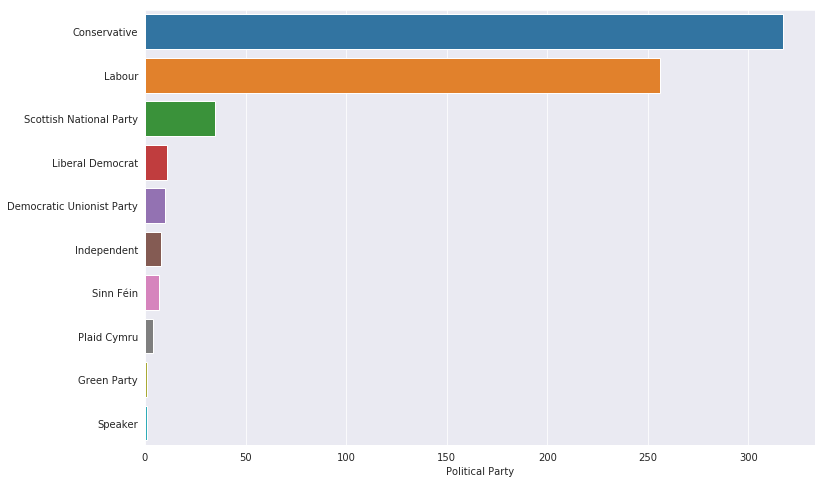

In [26]:
plt.figure(figsize=(12,8))
sns.set_style(style='darkgrid')
sns.barplot(data=df_vis,x="Political Party",y=df_vis.index)

**Analysis:** As you can clearly see the conservative party in this evaluation is the one that has more members

# Creation of the CSV file

In [27]:
New_df.to_csv('Political_Party.csv')

# **FINAL**